### Лабораторная работа №2

**Вариант 2**. Датасет: *Динамика продаж в супермаркете*.

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

In [147]:
df = pd.read_csv('../data/bigmart.csv').drop_duplicates()

Исправление признаков в датасете

In [148]:
df.drop(axis=1, columns=['Item_Identifier', 'Outlet_Identifier'], inplace=True)

**Численные признаки**

In [149]:
df['Item_Weight'].fillna(df['Item_Weight'].mean(), inplace=True)
df['Outlet_Size'].fillna(value='Medium', inplace=True)
df['Outlet_Establishment_Year'] = (2013 - df['Outlet_Establishment_Year'])
df['Item_Visibility'].replace(to_replace=0, value= df['Item_Visibility'].quantile(q=.10),inplace = True)
df.head()

C:\Users\k1\AppData\Local\Temp\ipykernel_8820\3784169956.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Item_Weight'].fillna(df['Item_Weight'].mean(), inplace=True)
C:\Users\k1\AppData\Local\Temp\ipykernel_8820\3784169956.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.


,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,0.016047,Dairy,249.8092,14,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,Regular,0.019278,Soft Drinks,48.2692,4,Medium,Tier 3,Supermarket Type2,443.4228
2,17.50,Low Fat,0.016760,Meat,141.6180,14,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.20,Regular,0.012042,Fruits and Vegetables,182.0950,15,Medium,Tier 3,Grocery Store,732.3800
4,8.93,Low Fat,0.012042,Household,53.8614,26,High,Tier 3,Supermarket Type1,994.7052


**Категориальные признаки**

In [150]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({
    'LF': 'Low Fat',
    'low fat': 'Low Fat',
    'reg': 'Regular'
})
dummy = pd.get_dummies(df,columns=['Item_Fat_Content','Item_Type','Outlet_Size','Outlet_Location_Type','Outlet_Type'],drop_first=True)
df = dummy
df.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_Regular,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,...,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0.016047,249.8092,14,3735.1380,False,False,False,False,True,...,False,False,False,True,False,False,False,True,False,False
1,5.92,0.019278,48.2692,4,443.4228,True,False,False,False,False,...,False,True,False,True,False,False,True,False,True,False
2,17.50,0.016760,141.6180,14,2097.2700,False,False,False,False,False,...,False,False,False,True,False,False,False,True,False,False
3,19.20,0.012042,182.0950,15,732.3800,True,False,False,False,False,...,False,False,False,True,False,False,True,False,False,False
4,8.93,0.012042,53.8614,26,994.7052,False,False,False,False,False,...,False,False,False,False,False,False,True,True,False,False


In [153]:
X = df.drop(['Item_Outlet_Sales'], axis=1).values
y = df['Item_Outlet_Sales'].values

In [154]:
sc_x = StandardScaler()
sc_y = StandardScaler()
X = sc_x.fit_transform(X)
y = sc_y.fit_transform(y.reshape(-1,1))

In [158]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

In [174]:
X_train.shape

(6818, 27)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN

#### Рекурентная нейронная сеть

In [ ]:
model_rnn = Sequential([
    SimpleRNN(64, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    SimpleRNN(16),
    Dense(1, activation='relu'),
])

model_rnn.compile(optimizer='adam', loss='mse', metrics=['mae'])
history_rnn = model_rnn.fit(X_train, y_train, epochs=20, validation_data=(X_val, y_val), verbose=1)

Epoch 1/20


c:\Users\k1\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


214/214 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.9755 - mae: 0.7859 - val_loss: 0.7674 - val_mae: 0.7307
Epoch 2/20
214/214 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.7608 - mae: 0.7246 - val_loss: 0.7411 - val_mae: 0.7181
Epoch 3/20
214/214 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.7161 - mae: 0.7039 - val_loss: 0.7344 - val_mae: 0.7212
Epoch 4/20
214/214 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.6995 - mae: 0.6983 - val_loss: 0.7052 - val_mae: 0.7068
Epoch 5/20
214/214 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.7018 - mae: 0.6974 - val_loss: 0.7229 - val_mae: 0.7109
Epoch 6/20
214/214 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.7006 - mae: 0.6956 - val_loss: 0.7099 - val_mae: 0.7091
Epoch 7/20
214/214 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.6890 - mae: 0.6986 - val_loss: 0.7187 - val_mae: 0.7098
Epoch 8/20
214/214 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.6951 - mae: 0.6939 - val_loss: 0.7214 - val_mae: 0.7136
Epoch 9/20
214/214 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.6786 

In [182]:
import matplotlib.pyplot as plt

#### График потерь

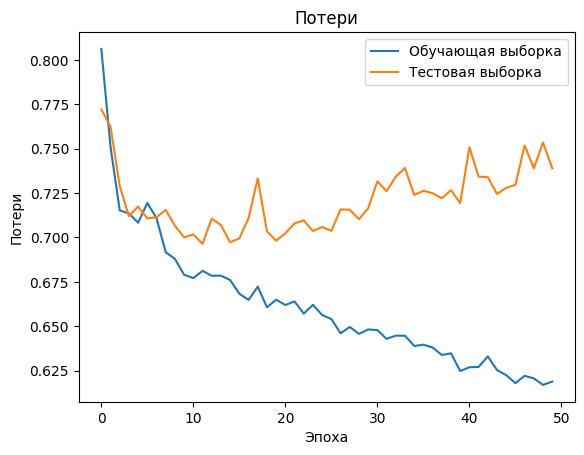

In [200]:
plt.plot(history_rnn.history['loss'], label='Обучающая выборка')
plt.plot(history_rnn.history['val_loss'], label='Тестовая выборка')
plt.xlabel('Эпоха')
plt.ylabel('Потери')
plt.title('Потери')
plt.legend()
plt.show()

#### График MAE (Mean Absolute Error)

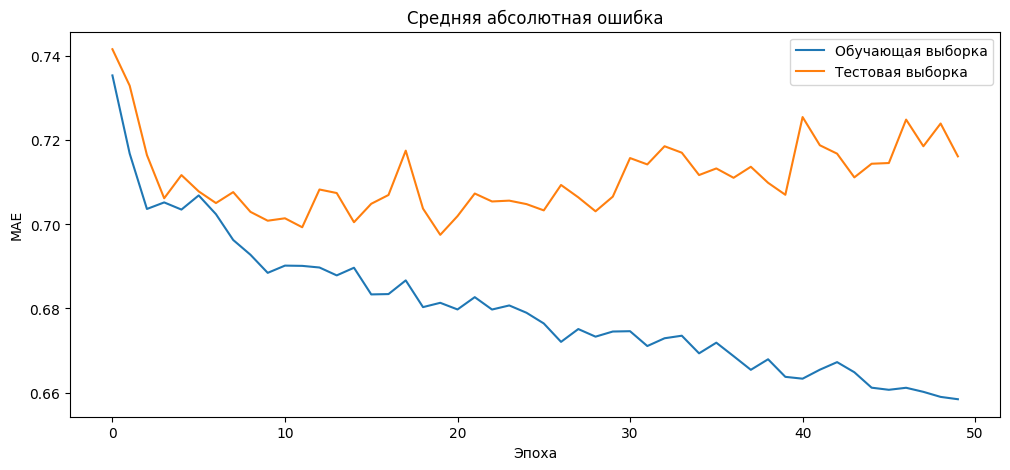

In [201]:
plt.figure(figsize=(12, 5))
plt.plot(history_rnn.history['mae'], label='Обучающая выборка')
plt.plot(history_rnn.history['val_mae'], label='Тестовая выборка')
plt.title('Средняя абсолютная ошибка')
plt.xlabel('Эпоха')
plt.ylabel('MAE')
plt.legend()
plt.show()

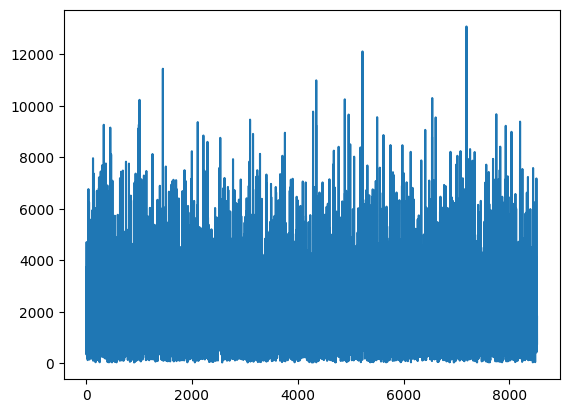

In [ ]:
plt.plot(df['Item_Outlet_Sales'])